In [1]:
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import scipy, math
from scipy import stats
import jp_mpl as jplot

import ROOT
import ntuple_tools
reload(ntuple_tools)

<module 'ntuple_tools' from '/home/jpyanez/snoplus/snoplus_python/ntuple_tools.pyc'>

In [5]:
basedir = '/home/jpyanez/scratch/snoplus/precuts'

In [6]:
var_names =['qpdtProbability',
            'qpdtNhitsEarly',
            'nhitsCleaned',
            'itr',
            'energy',
            'beta14',
            'posr']

In [21]:
#all_pmt_type = 'tb3_mc_tl208pmt'
all_pmt_type = 'all_pmt'
indir = basedir +'/'+all_pmt_type+'_npy'
all_pmt={}
for one_var in var_names:
    all_pmt[one_var] = np.load(os.path.join(indir, one_var+'.npy'))
all_pmt_tcp = 1-(1-all_pmt['qpdtProbability'])**all_pmt['qpdtNhitsEarly']
all_pmt_sitr = (0.74-all_pmt['itr'])*np.sqrt(all_pmt['nhitsCleaned'])/0.43

Diagnostics qpdtProbability
-0.00588907931991 1.0 0.449062112362
Diagnostics qpdtNhitsEarly
0.0 9.0 1.10873579147
Diagnostics nhitsCleaned
15.0 36.0 18.811532238
Diagnostics itr
0.117647058824 1.0 0.675468454752
Diagnostics energy
2.50000008741 16.6728968424 3.09915217788
Diagnostics beta14
-0.429509320801 4.80810806118 0.47064046758
Diagnostics posr
1624.74148005 7999.98712144 7179.55389571


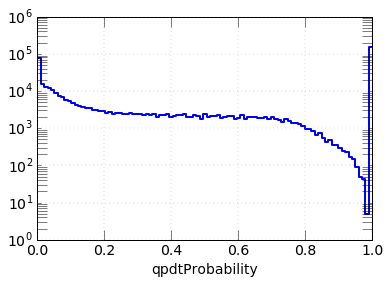

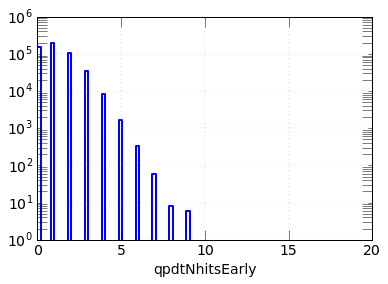

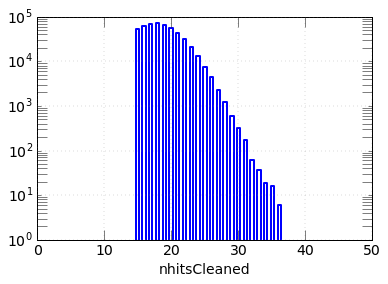

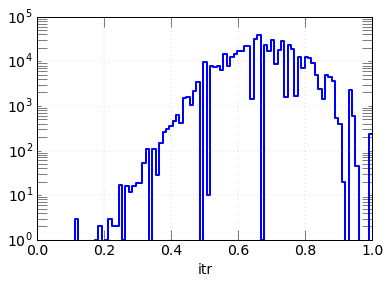

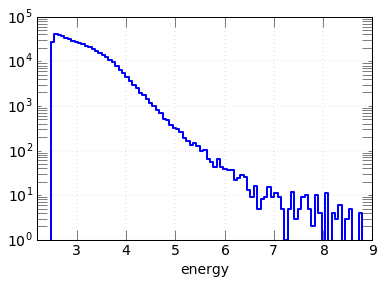

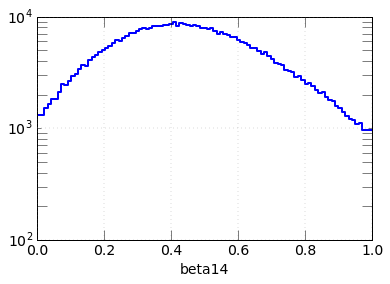

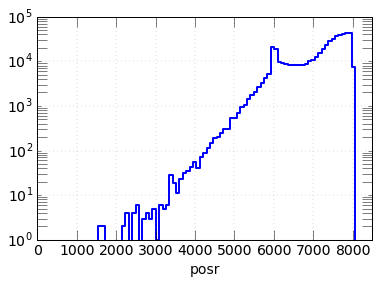

In [22]:
# Plots
my_keys = [['qpdtProbability', [0,1]],
           ['qpdtNhitsEarly', [0,20]],
           ['nhitsCleaned', [0,50]],
           ['itr', [0,1]],
           ['energy', [2.2, 9]],
           ['beta14', [0,1]],
           ['posr', [0, 8500]]
           ]

for one_key, axlim in my_keys:
    ntuple_tools.arrayDiagnostics(all_pmt[one_key], one_key,ax_lim=axlim)


Diagnostics TC QPDT Prob
-8.1830047878 0.0 -1.01085869743
Diagnostics Scaled ITR
-2.83606534315 6.05726533293 0.676243826587


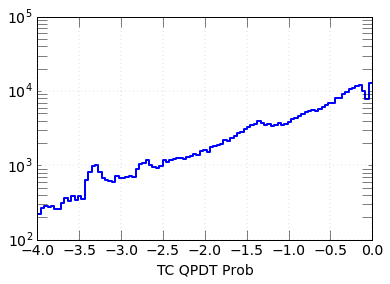

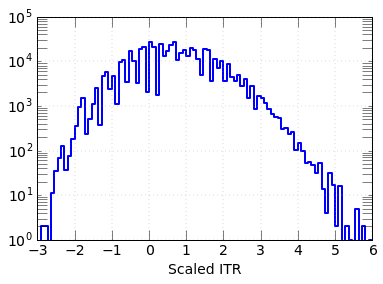

In [23]:
_ = ntuple_tools.arrayDiagnostics(np.log10(all_pmt_tcp[all_pmt_tcp>0]), 'TC QPDT Prob',ax_lim=[-4,0])
_ = ntuple_tools.arrayDiagnostics(all_pmt_sitr, 'Scaled ITR',ax_lim=[-3,6])


In [87]:
xenergy = np.linspace(3.25, 4, 12)
xcenergy = (xenergy[1:] + xenergy[:-1])/2.
xbeta14 = np.linspace(-0.12,0.95, 12)
xradius = np.linspace(0, .8, 12)
rav = 6000.


In [91]:
pmt_cuts = ((all_pmt['energy']>3.25) *
       (all_pmt['energy']<4.)*
       (all_pmt['beta14']<0.95)*
       (all_pmt['beta14']>-0.12)*
       (all_pmt['posr']<5500.))
print np.sum(pmt_cuts)
#scale = len(pmt_cuts)*1./np.sum(pmt_cuts)
#print scale

qpdtcut = all_pmt_tcp > 0.01
scale = np.sum(pmt_cuts)*1./np.sum(qpdtcut*pmt_cuts)
print scale

536
1.69085173502


/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in divide


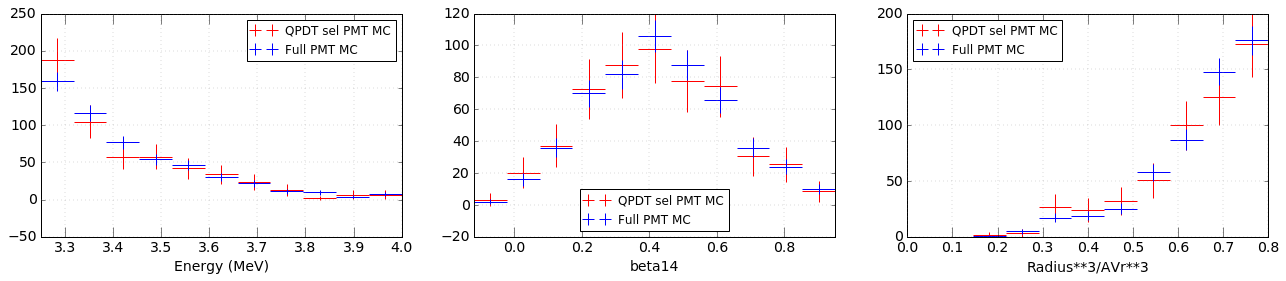

In [92]:
# Reproducing figures 16.12 : Energy, beta14, posr. QPDT selected vs full MC
fig = plt.figure(figsize=(22,4))

ax1 = fig.add_subplot(131)
bfull, x = np.histogram(all_pmt['energy'][pmt_cuts], xenergy)
bcut, x = np.histogram(all_pmt['energy'][pmt_cuts *qpdtcut], xenergy)
cuterror = scale*np.sqrt(bcut)/bcut
jplot.errorMark(xenergy, scale*bcut, rel_error = cuterror, color='red',
               label='QPDT sel PMT MC')
jplot.errorMark(xenergy, bfull,
               label='Full PMT MC')

plt.legend(loc=0)
plt.xlabel('Energy (MeV)')

ax2 = fig.add_subplot(132)
bfull, x = np.histogram(all_pmt['beta14'][pmt_cuts], xbeta14)
bcut, x = np.histogram(all_pmt['beta14'][pmt_cuts *qpdtcut], xbeta14)
cuterror = scale*np.sqrt(bcut)/bcut
jplot.errorMark(xbeta14, scale*bcut, rel_error = cuterror, color='red',
                label='QPDT sel PMT MC')
jplot.errorMark(xbeta14, bfull,
                label='Full PMT MC')

plt.legend(loc=0)
plt.xlabel('beta14')

ax3 = fig.add_subplot(133)
bfull, x = np.histogram(all_pmt['posr'][pmt_cuts]**3/rav**3, xradius)
bcut, x = np.histogram(all_pmt['posr'][pmt_cuts *qpdtcut]**3/rav**3, xradius)
cuterror = scale*np.sqrt(bcut)/bcut
jplot.errorMark(xradius, scale*bcut, rel_error = cuterror, color='red',
               label='QPDT sel PMT MC')
jplot.errorMark(xradius, bfull,
                label='Full PMT MC')

plt.legend(loc=0)
plt.xlabel('Radius**3/AVr**3')

fig.savefig('/home/jpyanez/snoplus/analysis/water_analysis/qpdt_figures/Fig_16_12_qpdt_full_vs_selected.png', dpi=200)

219 219.0


/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


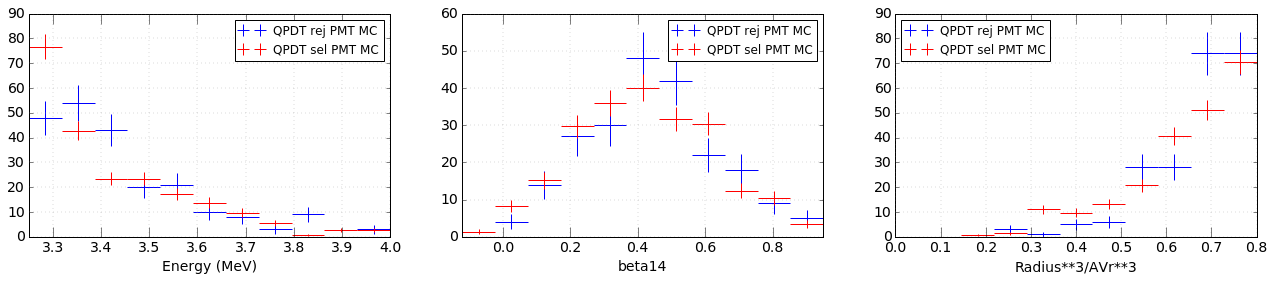

In [93]:
# Reproducing figures 16.12 : Energy, beta14, posr. QPDT selected vs full MC

scale = np.sum(~qpdtcut*pmt_cuts)*1./np.sum(pmt_cuts*qpdtcut)

fig = plt.figure(figsize=(22,4))

ax1 = fig.add_subplot(131)
bfull, x = np.histogram(all_pmt['energy'][pmt_cuts*~qpdtcut], xenergy)
bcut, x = np.histogram(all_pmt['energy'][pmt_cuts *qpdtcut], xenergy)
cuterror = scale*np.sqrt(bcut)/bcut
jplot.errorMark(xenergy, bfull,
               label='QPDT rej PMT MC')
jplot.errorMark(xenergy, scale*bcut, rel_error = cuterror, color='red',
               label='QPDT sel PMT MC')
plt.legend(loc=0)
plt.xlabel('Energy (MeV)')

ax2 = fig.add_subplot(132)
bfull, x = np.histogram(all_pmt['beta14'][pmt_cuts*~qpdtcut], xbeta14)
bcut, x = np.histogram(all_pmt['beta14'][pmt_cuts *qpdtcut], xbeta14)
cuterror = scale*np.sqrt(bcut)/bcut
jplot.errorMark(xbeta14, bfull,
                label='QPDT rej PMT MC')
jplot.errorMark(xbeta14, scale*bcut, rel_error = cuterror, color='red',
                label='QPDT sel PMT MC')
print np.sum(bfull), np.sum(bcut)*scale
plt.legend(loc=0)
plt.xlabel('beta14')

ax3 = fig.add_subplot(133)
bfull, x = np.histogram(all_pmt['posr'][pmt_cuts*~qpdtcut]**3/rav**3, xradius)
bcut, x = np.histogram(all_pmt['posr'][pmt_cuts *qpdtcut]**3/rav**3, xradius)
cuterror = scale*np.sqrt(bcut)/bcut
jplot.errorMark(xradius, bfull,
                label='QPDT rej PMT MC')
jplot.errorMark(xradius, scale*bcut, rel_error = cuterror, color='red',
               label='QPDT sel PMT MC')
plt.legend(loc=0)
plt.xlabel('Radius**3/AVr**3')
fig.savefig('/home/jpyanez/snoplus/analysis/water_analysis/qpdt_figures/Fig_16_12b_qpdt_selected_vs_rejected.png', dpi=200)

In [94]:
# Now getting the light water region and PMT MC
# All Beta14

In [95]:
data_type = 'tb6_data'
indir = basedir +'/'+data_type+'_npy'
data_tb6={}
for one_var in var_names:
    data_tb6[one_var] = np.load(os.path.join(indir, one_var+'.npy'))
data_tb6_tcp = 1-(1-data_tb6['qpdtProbability'])**data_tb6['qpdtNhitsEarly']
data_tb6_sitr = (0.74-data_tb6['itr'])*np.sqrt(data_tb6['nhitsCleaned'])/0.43

In [96]:
# Reproducing figure 16.13 - all for beta14 (light water region)

In [103]:
lw_pmt = ((all_pmt['energy']>3.5) *
       (all_pmt['energy']<4.)*
       (all_pmt['beta14']<0.95)*
       (all_pmt['beta14']>-0.12)*
       (all_pmt['posr']>6100.))
print np.sum(lw_pmt)

lw_data = ((data_tb6['energy']>3.5) *
       (data_tb6['energy']<4.)*
       (data_tb6['beta14']<0.95)*
       (data_tb6['beta14']>-0.12)*
       (data_tb6['posr']>6100.))
print np.sum(lw_data)
#scale = len(pmt_cuts)*1./np.sum(pmt_cuts)
#print scale

qpdt_pmt = all_pmt_tcp > 0.01
qpdt_data = data_tb6_tcp > 0.01


61933
267733


99864.0 99864
267733.0 267733
61933.0 61933


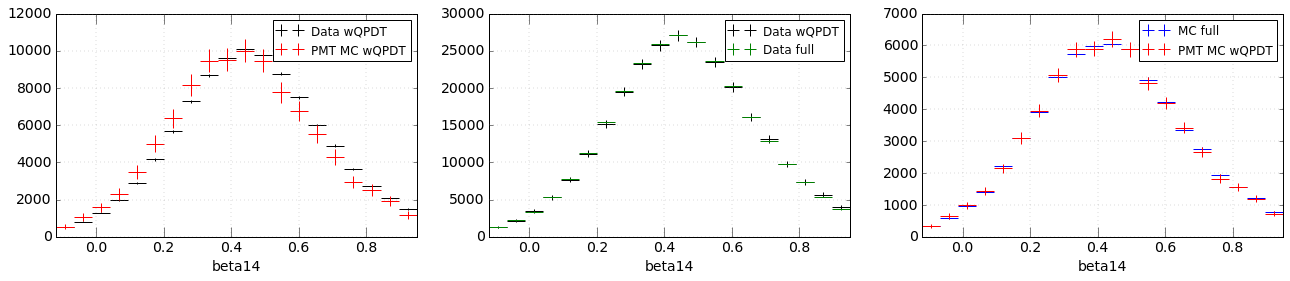

In [104]:
fig = plt.figure(figsize=(22,4))
xbeta14 = np.linspace(-0.12,0.95, 21)

# Data passing QPDT cut
bdata_qpdt, x = np.histogram(data_tb6['beta14'][lw_data*qpdt_data], xbeta14)
bmc_qpdt, x = np.histogram(all_pmt['beta14'][lw_pmt*qpdt_pmt], xbeta14)

# All data
bdata_all, x = np.histogram(data_tb6['beta14'][lw_data], xbeta14)
bmc_all, x = np.histogram(all_pmt['beta14'][lw_pmt], xbeta14)


ax1 = fig.add_subplot(131)
jplot.errorMark(x, bdata_qpdt, color = 'k', label='Data wQPDT')
scale = bdata_qpdt.sum()*1./bmc_qpdt.sum()
print bmc_qpdt.sum()*scale, bdata_qpdt.sum()

relerror = np.sqrt(bmc_qpdt)/bmc_qpdt
jplot.errorMark(x, scale*bmc_qpdt, rel_error=relerror*scale, color='red', label='PMT MC wQPDT' )
plt.legend(loc=0)
plt.xlabel('beta14')

ax2 = fig.add_subplot(132)
scale = bdata_all.sum()*1./bdata_qpdt.sum()
print bdata_qpdt.sum()*scale, bdata_all.sum()
relerror = np.sqrt(bdata_qpdt)/bdata_qpdt
jplot.errorMark(x, scale*bdata_qpdt, rel_error=relerror*scale, color='black' , label='Data wQPDT')
jplot.errorMark(x, bdata_all, color = 'green', label='Data full')
plt.legend(loc=0)
plt.xlabel('beta14')

ax3 = fig.add_subplot(133)
jplot.errorMark(x, bmc_all, color = 'blue', label='MC full')
scale = bmc_all.sum()*1./bmc_qpdt.sum()
print bmc_qpdt.sum()*scale, bmc_all.sum()
relerror = np.sqrt(bmc_qpdt)/bmc_qpdt
jplot.errorMark(x, scale*bmc_qpdt, rel_error=relerror*scale, color='red' , label='PMT MC wQPDT')
plt.legend(loc=0)
plt.xlabel('beta14')
fig.savefig('/home/jpyanez/snoplus/analysis/water_analysis/qpdt_figures/Fig_16_13_beta14_data_mc.png', dpi=200)

/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


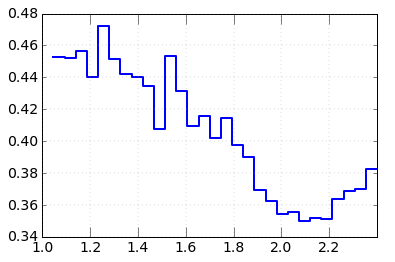

In [108]:
# Figure 16.14
fig = plt.figure()
#The fraction of data and Monte Carlo PMT events selected by the QPDT cut
#in the H2O region, as a function of radial position. The AV is at rho = 1.0.

xradius = np.linspace(1., 2.4, 31)

# Data. Fraction selected 
# Data passing QPDT cut
bdata_qpdt, x = np.histogram(data_tb6['posr'][lw_data*qpdt_data]**3/rav**3, xradius)
bmc_qpdt, x = np.histogram(all_pmt['posr'][lw_pmt*qpdt_pmt]**3/rav**3, xradius)

bdata_all, x = np.histogram(data_tb6['posr'][lw_data]**3/rav**3, xradius)
bmc_all, x = np.histogram(all_pmt['posr'][lw_pmt]**3/rav**3, xradius)


jplot.unfilledBar(x, bdata_qpdt*1./bdata_all, )
jplot.unfilledBar(x, bmc_qpdt*1./bmc_all, color='r')

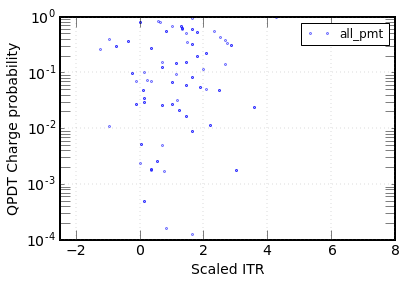

In [54]:
plt.plot(all_pmt_sitr[pmt_pmt_cuts], 
         all_pmt_tcp[pmt_pmt_cuts], '.', markersize=1,
        label=all_pmt_type)
plt.xlim(-2.5, 8)
plt.ylim(1E-4, 1)
plt.yscale('log')
plt.xlabel('Scaled ITR')
plt.ylabel('QPDT Charge probability')
plt.legend(loc=0)

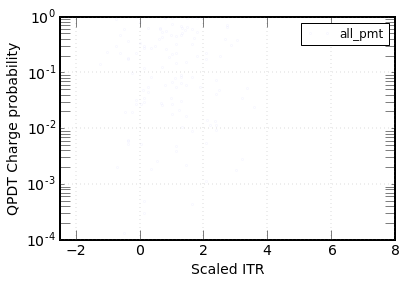

In [15]:
plt.plot(all_pmt_sitr[pmt_pmt_cuts], 
         all_pmt_tcp[pmt_pmt_cuts], '.', markersize=0.05,
        label=all_pmt_type)
plt.xlim(-2.5, 8)
plt.ylim(1E-4, 1)
plt.yscale('log')
plt.xlabel('Scaled ITR')
plt.ylabel('QPDT Charge probability')
plt.legend(loc=0)

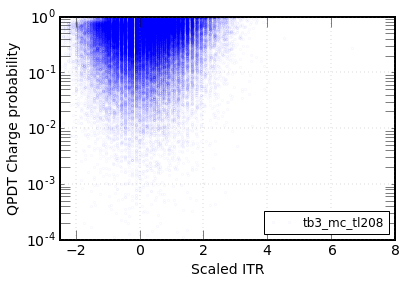

In [21]:
plt.plot(all_pmt_sitr[pmt_pmt_cuts], 
         all_pmt_tcp[pmt_pmt_cuts], '.', markersize=0.05,
        label=all_pmt_type)
plt.xlim(-2.5, 8)
plt.ylim(1E-4, 1)
plt.yscale('log')
plt.xlabel('Scaled ITR')
plt.ylabel('QPDT Charge probability')
plt.legend(loc=0)